## **Dataset: Adult - UCI Machine Learning Repository**

Link: https://archive.ics.uci.edu/dataset/2/adult

### Selecionando os melhores Atributos

In [1]:
import pandas as pd
dataset = pd.read_csv("data/adult_data_processed.csv")
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [2]:
# Ferramentas para Pré-Processamento

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [4]:
X = dataset.iloc[:, 0:14].values
y = dataset.iloc[:, 14].values

display(X, y)

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [40, ' Private', 154374, ..., 0, 40, ' United-States'],
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States']],
      shape=(32560, 14), dtype=object)

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      shape=(32560,), dtype=object)

In [5]:
codificador_label = LabelEncoder()


for i in range(X.shape[1]):
    X[:,i] = codificador_label.fit_transform(X[:, i])
    

In [6]:
padronizador = StandardScaler()
x_scale = padronizador.fit_transform(X)
y_coding = codificador_label.fit_transform(y)

x_scale

array([[ 0.03080871,  2.62430941, -1.29407819, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [ 0.83753836,  1.72111602, -1.25192133, ..., -0.20417998,
        -2.25444135,  0.26137428],
       [-0.04253035, -0.08527078,  0.59306157, ..., -0.20417998,
        -0.03112222,  0.26137428],
       ...,
       [ 0.10414777, -0.08527078, -0.39985664, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [ 1.42425084, -0.08527078, -0.43242489, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [-1.2159553 , -0.08527078,  0.39384971, ..., -0.20417998,
        -1.67802528,  0.26137428]], shape=(32560, 14))

In [7]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy = 'majority')
x_scale, y_coding = tl.fit_resample(x_scale, y_coding)
x_scale

array([[ 0.03080871,  2.62430941, -1.29407819, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [-0.04253035, -0.08527078,  0.59306157, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [ 1.05755554, -0.08527078,  0.79971288, ..., -0.20417998,
        -0.03112222,  0.26137428],
       ...,
       [ 0.10414777, -0.08527078, -0.39985664, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [ 1.42425084, -0.08527078, -0.43242489, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [-1.2159553 , -0.08527078,  0.39384971, ..., -0.20417998,
        -1.67802528,  0.26137428]], shape=(30966, 14))

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_scale, y_coding)
importances = pd.DataFrame(data={
    'Attribute': dataset.columns.drop("income"),
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'relationship'),
  Text(1, 0, 'fnlwgt'),
  Text(2, 0, 'education-num'),
  Text(3, 0, 'age'),
  Text(4, 0, 'capital-gain'),
  Text(5, 0, 'hours-per-week'),
  Text(6, 0, 'occupation'),
  Text(7, 0, 'workclass'),
  Text(8, 0, 'capital-loss'),
  Text(9, 0, 'native-country'),
  Text(10, 0, 'race'),
  Text(11, 0, 'education'),
  Text(12, 0, 'marital-status'),
  Text(13, 0, 'sex')])

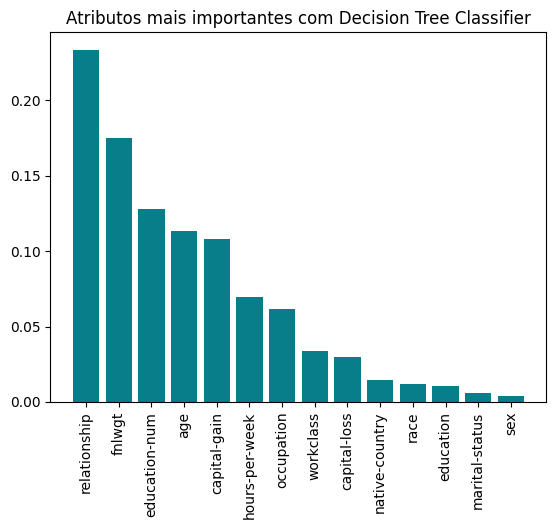

In [9]:
import matplotlib.pyplot as plt

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title("Atributos mais importantes com Decision Tree Classifier")
plt.xticks(rotation='vertical')

In [10]:
attributes = ["fnlwgt", "relationship", "age", "capital-gain", "education-num", "income"]

In [11]:
dataset_features_importance = dataset[attributes]
dataset_features_importance

,fnlwgt,relationship,age,capital-gain,education-num,income
0,77516,Not-in-family,39,2174,13,<=50K
1,83311,Husband,50,0,13,<=50K
2,215646,Not-in-family,38,0,9,<=50K
3,234721,Husband,53,0,7,<=50K
4,338409,Wife,28,0,13,<=50K
...,...,...,...,...,...,...
32555,310152,Not-in-family,22,0,10,<=50K
32556,257302,Wife,27,0,12,<=50K
32557,154374,Husband,40,0,9,>50K
32558,151910,Unmarried,58,0,9,<=50K


In [12]:
x_features_importance = dataset_features_importance.iloc[:, 0:5].values
y_features_importance = dataset_features_importance.iloc[:, 5].values

x_features_importance, y_features_importance

(array([[77516, ' Not-in-family', 39, 2174, 13],
        [83311, ' Husband', 50, 0, 13],
        [215646, ' Not-in-family', 38, 0, 9],
        ...,
        [154374, ' Husband', 40, 0, 9],
        [151910, ' Unmarried', 58, 0, 9],
        [201490, ' Own-child', 22, 0, 9]], shape=(32560, 5), dtype=object),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
       shape=(32560,), dtype=object))

In [13]:
for i in range(x_features_importance.shape[1]):
    x_features_importance[:, i] = codificador_label.fit_transform(x_features_importance[:, i])

y_features_importance = codificador_label.fit_transform(y_features_importance)

x_features_importance, y_features_importance

(array([[2671, 1, 22, 25, 12],
        [2926, 0, 33, 0, 12],
        [14086, 1, 21, 0, 8],
        ...,
        [8080, 0, 23, 0, 8],
        [7883, 4, 41, 0, 8],
        [12881, 3, 5, 0, 8]], shape=(32560, 5), dtype=object),
 array([0, 0, 0, ..., 1, 0, 0], shape=(32560,)))

In [14]:
x_importance_features = padronizador.fit_transform(x_features_importance)
x_importance_features, y_features_importance

(array([[-1.29407819, -0.27775371,  0.03080871,  0.79429485,  1.13471151],
        [-1.25192133, -0.90016671,  0.83753836, -0.2789661 ,  1.13471151],
        [ 0.59306157, -0.27775371, -0.04253035, -0.2789661 , -0.42006721],
        ...,
        [-0.39985664, -0.90016671,  0.10414777, -0.2789661 , -0.42006721],
        [-0.43242489,  1.58948528,  1.42425084, -0.2789661 , -0.42006721],
        [ 0.39384971,  0.96707228, -1.2159553 , -0.2789661 , -0.42006721]],
       shape=(32560, 5)),
 array([0, 0, 0, ..., 1, 0, 0], shape=(32560,)))

In [15]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy = 'majority')
x_importance_features, y_features_importance = tl.fit_resample(x_importance_features, y_features_importance)
x_importance_features

array([[-1.29407819, -0.27775371,  0.03080871,  0.79429485,  1.13471151],
       [-1.25192133, -0.90016671,  0.83753836, -0.2789661 ,  1.13471151],
       [ 0.59306157, -0.27775371, -0.04253035, -0.2789661 , -0.42006721],
       ...,
       [-0.39985664, -0.90016671,  0.10414777, -0.2789661 , -0.42006721],
       [-0.43242489,  1.58948528,  1.42425084, -0.2789661 , -0.42006721],
       [ 0.39384971,  0.96707228, -1.2159553 , -0.2789661 , -0.42006721]],
      shape=(30555, 5))

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_importance_features, y_features_importance, test_size=0.15)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sn


def PerformanceMetrics(y_true, predict, class_name):
    # Imprime Matriz de Confusão:

    confusion_matrix_df = pd.DataFrame(
        confusion_matrix(y_true, predict), 
        index=class_name, 
        columns=class_name
    )

    plt.figure(figsize=(5,3))
    sn.set_theme(font_scale=0.9, )
    sn.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)

    # Imprime a Acurácia:

    print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_true, predict) * 100:.2f}%.")
    for i, label in enumerate(class_name):
        print(f"O modelo identificou corretamente {confusion_matrix_df.values[i][i]} registros com o rótulo '{label}'.")

    fpr, tpr, thresholds = roc_curve(y_true, predict)
    auc = roc_auc_score(y_true, predict)
    plt.figure(figsize=(5,3))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha diagonal (classificador aleatório)
    plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
    plt.title('Curva ROC', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

roc_data = []

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.ensemble import BalancedRandomForestClassifier

#### Regressão Logística

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 81.85%.
O modelo identificou corretamente 3202 registros com o rótulo '<=50K'.
O modelo identificou corretamente 550 registros com o rótulo '>50K'.


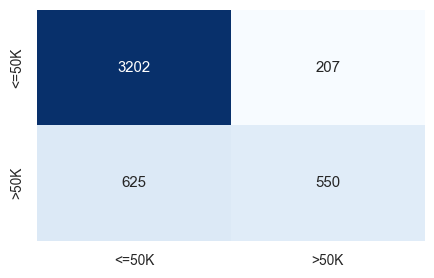

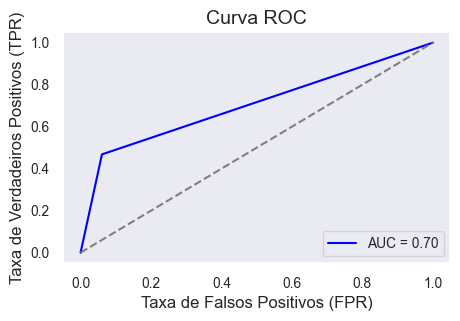

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3409
           1       0.73      0.47      0.57      1175

    accuracy                           0.82      4584
   macro avg       0.78      0.70      0.73      4584
weighted avg       0.81      0.82      0.80      4584



In [19]:
model_log = LogisticRegression()
model_log.fit(x_train, y_train)
predict = model_log.predict(x_test)
PerformanceMetrics(y_test, predict, ["<=50K", ">50K"])
print(classification_report(y_test, predict))


#### Support Vector Machines

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 84.84%.
O modelo identificou corretamente 3250 registros com o rótulo '<=50K'.
O modelo identificou corretamente 639 registros com o rótulo '>50K'.


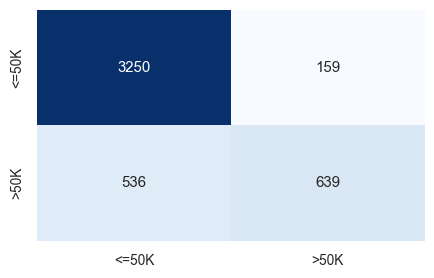

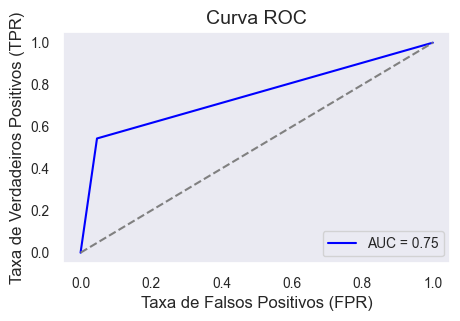

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3409
           1       0.80      0.54      0.65      1175

    accuracy                           0.85      4584
   macro avg       0.83      0.75      0.78      4584
weighted avg       0.84      0.85      0.84      4584



In [20]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
predict = model_svm.predict(x_test)
PerformanceMetrics(y_test, predict, ["<=50K", ">50K"])
print(classification_report(y_test, predict))


#### Random Forest Classifier

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 87.17%.
O modelo identificou corretamente 3177 registros com o rótulo '<=50K'.
O modelo identificou corretamente 819 registros com o rótulo '>50K'.


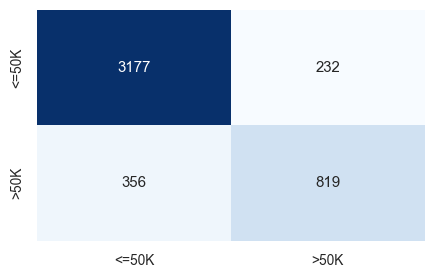

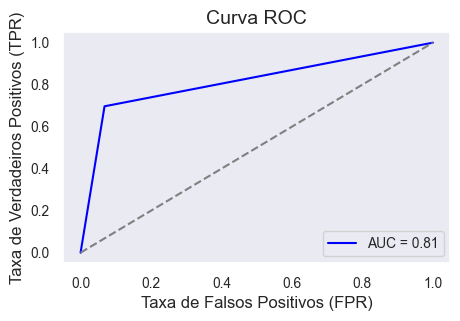

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3409
           1       0.78      0.70      0.74      1175

    accuracy                           0.87      4584
   macro avg       0.84      0.81      0.83      4584
weighted avg       0.87      0.87      0.87      4584



In [21]:
model_random = RandomForestClassifier()
model_random.fit(x_train, y_train)
predict = model_random.predict(x_test)
PerformanceMetrics(y_test, predict, ["<=50K", ">50K"])
print(classification_report(y_test, predict))


#### Gradient Boosting Classifier

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 86.02%.
O modelo identificou corretamente 3205 registros com o rótulo '<=50K'.
O modelo identificou corretamente 738 registros com o rótulo '>50K'.


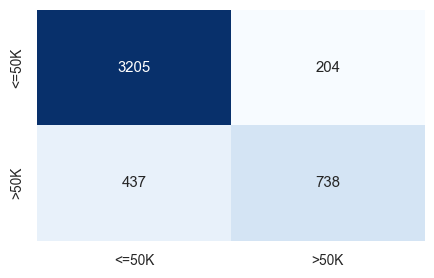

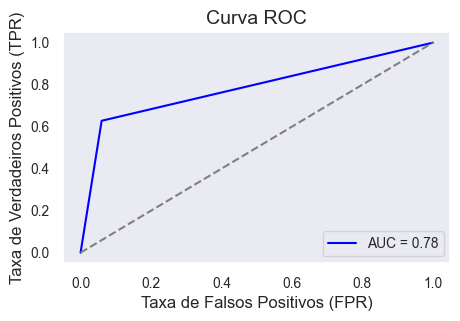

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3409
           1       0.78      0.63      0.70      1175

    accuracy                           0.86      4584
   macro avg       0.83      0.78      0.80      4584
weighted avg       0.86      0.86      0.85      4584



In [22]:
model_gradient = GradientBoostingClassifier()
model_gradient.fit(x_train, y_train)
predict = model_gradient.predict(x_test)
PerformanceMetrics(y_test, predict, ["<=50K", ">50K"])
print(classification_report(y_test, predict))


#### Neural Network Classification

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 85.41%.
O modelo identificou corretamente 3177 registros com o rótulo '<=50K'.
O modelo identificou corretamente 738 registros com o rótulo '>50K'.


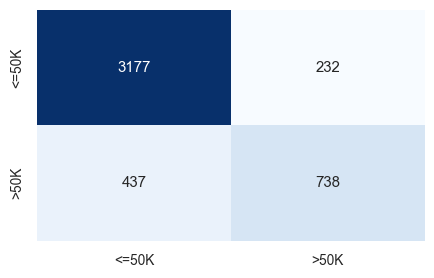

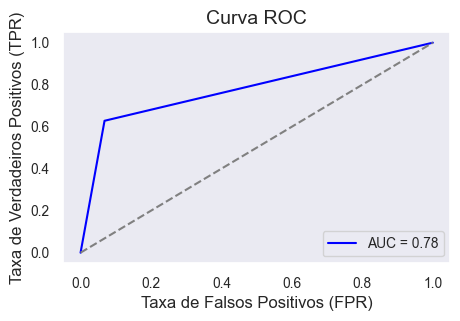

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3409
           1       0.76      0.63      0.69      1175

    accuracy                           0.85      4584
   macro avg       0.82      0.78      0.80      4584
weighted avg       0.85      0.85      0.85      4584



In [23]:
model_neural = MLPClassifier()
model_neural.fit(x_train, y_train)
predict = model_neural.predict(x_test)
PerformanceMetrics(y_test, predict, ["<=50K", ">50K"])
print(classification_report(y_test, predict))


#### Balanced Random Forest Classifier:

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 85.23%.
O modelo identificou corretamente 2960 registros com o rótulo '<=50K'.
O modelo identificou corretamente 947 registros com o rótulo '>50K'.


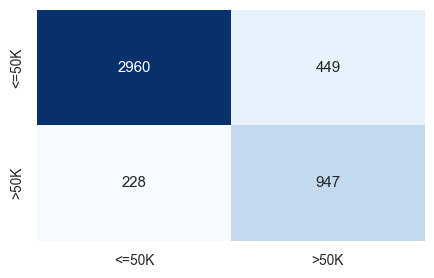

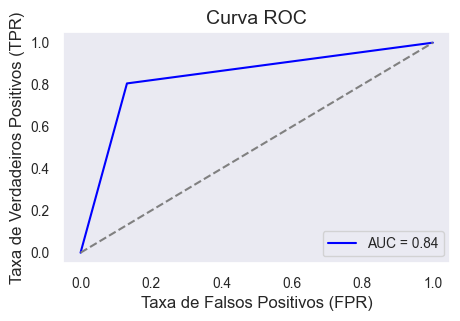

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3409
           1       0.68      0.81      0.74      1175

    accuracy                           0.85      4584
   macro avg       0.80      0.84      0.82      4584
weighted avg       0.86      0.85      0.86      4584



In [24]:
model_balanced = BalancedRandomForestClassifier()
model_balanced.fit(x_train, y_train)
predict = model_balanced.predict(x_test)
PerformanceMetrics(y_test, predict, ["<=50K", ">50K"])
print(classification_report(y_test, predict))


## Conclusão

- De maneira geral, nota-se que após aplicar o método de seleção de features com o Decision Tree Classifier o desempenho dos algoritmos caiu um pouco em relação a sua capacidade de classificar registros que ganham uma renda superior a US$50.000 por ano. Por causa disso, iremos permanecer todas as features no treinamento principal.

<a href="2main.ipynb">Direcionando para o Arquivo de Preparação/Treinamento dos Dados</a>